## Thompsons Sampling

### Index 
- [Equation and Method](#equation)
- [Pre processing](#preprocessing)
- [Building the model](#building)
- [Result](#result)

In [2]:
# importing some basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='equation'></a>
### Equation and Method

The basic idea behind thompson's sampling compared to UCB is that, this is a probabilistic exploration or reinforcement. In, upper confidence bound we exploited the one having the highest upper bound. In Thompson's sampling, we convert the click through rates or success of the one-armed bandit in terms of a Bernouli distribution. And then we use the Bayesian formula for estimating the probability of success. In common terms, we can say that we develop a normal distribution centred around the readings that we take, and then we explore the ads from the distribution generated. I.e the one with the higher probability will be explored further.

##### Algorithm

1. We consider 2 numbers,
    - $N^{1}_{i}$ - The number of times ad i got reward 1.
    - $N^{0}_{i}$ - The number of times ad i got reward 0.


2. For each ad i we take a random draw according to the distribution.
    $\theta(n) = \beta(N^{1}_{i}+1 , N^{0}_{i}+1)$


3. We select the ad that has the highest $\theta$.

<a id='preprocessing'></a>
### Pre processing

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


<a id='building'></a>
### Building the model.
Training the model using Simple Linear Regression

In [4]:
import random

In [5]:
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0

In [6]:
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

<a id='result'></a>
### Result

In [7]:
print(total_reward)

2628


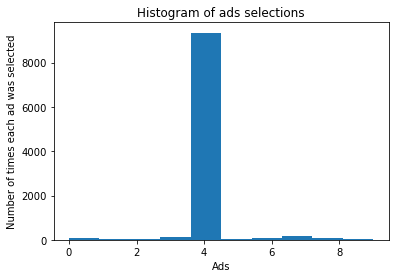

In [8]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

##### Result

We got a higher number of rewards compared to the UCB method. And we can also see that, this method chose the ad 5. And one more thing that adds to the advantage is that the ad 5 was selected more compared to the former one.